# Yashil makon AI


## 1. Collecting data


Dataset day parts
| Day Part | Start Time | End Time | Duration (hours) |
| -------- | ---------- | -------- | ---------------- |
| Morning  | 06:00      | 12:00    | 6                |
| Noon     | 12:00      | 16:00    | 4                |
| Evening  | 16:00      | 20:00    | 4                |
| Night    | 20:00      | 06:00*   | 10               |


In [65]:
#! pip install pandas
 
import pandas as pd 
import numpy as np

In [66]:

df = pd.read_csv('test.csv')
df


,date,day_part,air_temp_mean,air_temp_min,air_temp_max,air_hum_mean,air_hum_min,air_hum_max,soil_moist_mean,soil_moist_min,soil_moist_max,watering_24h,watering_2d,watering_in_3d,watering_in_1w,start_time_min,duration
0,2025-01-01,morning,12,10,15,80,75,85,0.78,0.72,0.83,0,0,0,0,420,0
1,2025-01-01,noon,14,12,17,78,72,82,0.76,0.70,0.80,5,5,5,5,800,5
2,2025-01-01,evening,15,13,18,76,70,80,0.73,0.68,0.77,10,10,10,10,1100,10
3,2025-01-01,night,13,11,16,82,76,88,0.80,0.75,0.84,0,10,10,10,200,0
4,2025-01-02,morning,16,13,19,75,70,80,0.70,0.65,0.75,15,15,15,12,450,10
5,2025-01-02,noon,18,15,22,73,68,78,0.66,0.60,0.71,20,35,30,20,780,15
6,2025-01-02,evening,20,17,24,70,65,75,0.62,0.55,0.68,25,40,35,25,1080,20
7,2025-01-02,night,18,16,22,74,68,80,0.67,0.62,0.71,10,25,30,20,150,5
8,2025-01-03,morning,17,14,21,72,66,78,0.68,0.63,0.73,15,30,40,30,380,10
9,2025-01-03,noon,21,18,26,68,63,72,0.60,0.54,0.66,30,45,55,40,900,20


In [67]:
months = [int(row[1]) for row in df['date'].str.split('-')]
days = [int(row[2]) for row in df['date'].str.split('-')]

df['month'] = pd.Series(months)
df['day'] = pd.Series(days)

def day_part_encoder(key: str) -> int:
    return {
        'morning': 1,
        'noon': 2,
        'evening': 3,
        'night': 4
    }.get(key)

df['day_part_int'] = pd.Series([day_part_encoder(part) for part in df['day_part']])
df

,date,day_part,air_temp_mean,air_temp_min,air_temp_max,air_hum_mean,air_hum_min,air_hum_max,soil_moist_mean,soil_moist_min,soil_moist_max,watering_24h,watering_2d,watering_in_3d,watering_in_1w,start_time_min,duration,month,day,day_part_int
0,2025-01-01,morning,12,10,15,80,75,85,0.78,0.72,0.83,0,0,0,0,420,0,1,1,1
1,2025-01-01,noon,14,12,17,78,72,82,0.76,0.70,0.80,5,5,5,5,800,5,1,1,2
2,2025-01-01,evening,15,13,18,76,70,80,0.73,0.68,0.77,10,10,10,10,1100,10,1,1,3
3,2025-01-01,night,13,11,16,82,76,88,0.80,0.75,0.84,0,10,10,10,200,0,1,1,4
4,2025-01-02,morning,16,13,19,75,70,80,0.70,0.65,0.75,15,15,15,12,450,10,1,2,1
5,2025-01-02,noon,18,15,22,73,68,78,0.66,0.60,0.71,20,35,30,20,780,15,1,2,2
6,2025-01-02,evening,20,17,24,70,65,75,0.62,0.55,0.68,25,40,35,25,1080,20,1,2,3
7,2025-01-02,night,18,16,22,74,68,80,0.67,0.62,0.71,10,25,30,20,150,5,1,2,4
8,2025-01-03,morning,17,14,21,72,66,78,0.68,0.63,0.73,15,30,40,30,380,10,1,3,1
9,2025-01-03,noon,21,18,26,68,63,72,0.60,0.54,0.66,30,45,55,40,900,20,1,3,2


In [68]:
df.columns

Index(['date', 'day_part', 'air_temp_mean', 'air_temp_min', 'air_temp_max',
       'air_hum_mean', 'air_hum_min', 'air_hum_max', 'soil_moist_mean',
       'soil_moist_min', 'soil_moist_max', 'watering_24h', 'watering_2d',
       'watering_in_3d', 'watering_in_1w', 'start_time_min', 'duration',
       'month', 'day', 'day_part_int'],
      dtype='object')

In [69]:
df2 = df.loc[:, ['day', 'month', 'day_part_int', 
           'air_temp_mean', 'air_temp_min', 'air_temp_max',
           'air_hum_mean', 'air_hum_min', 'air_hum_max',
           'soil_moist_mean', 'soil_moist_min', 'soil_moist_max',
           'watering_24h', 'watering_2d', 'watering_in_3d', 'watering_in_1w',
           'start_time_min', 'duration']]
df2

,day,month,day_part_int,air_temp_mean,air_temp_min,air_temp_max,air_hum_mean,air_hum_min,air_hum_max,soil_moist_mean,soil_moist_min,soil_moist_max,watering_24h,watering_2d,watering_in_3d,watering_in_1w,start_time_min,duration
0,1,1,1,12,10,15,80,75,85,0.78,0.72,0.83,0,0,0,0,420,0
1,1,1,2,14,12,17,78,72,82,0.76,0.70,0.80,5,5,5,5,800,5
2,1,1,3,15,13,18,76,70,80,0.73,0.68,0.77,10,10,10,10,1100,10
3,1,1,4,13,11,16,82,76,88,0.80,0.75,0.84,0,10,10,10,200,0
4,2,1,1,16,13,19,75,70,80,0.70,0.65,0.75,15,15,15,12,450,10
5,2,1,2,18,15,22,73,68,78,0.66,0.60,0.71,20,35,30,20,780,15
6,2,1,3,20,17,24,70,65,75,0.62,0.55,0.68,25,40,35,25,1080,20
7,2,1,4,18,16,22,74,68,80,0.67,0.62,0.71,10,25,30,20,150,5
8,3,1,1,17,14,21,72,66,78,0.68,0.63,0.73,15,30,40,30,380,10
9,3,1,2,21,18,26,68,63,72,0.60,0.54,0.66,30,45,55,40,900,20


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              36 non-null     int64  
 1   month            36 non-null     int64  
 2   day_part_int     36 non-null     int64  
 3   air_temp_mean    36 non-null     int64  
 4   air_temp_min     36 non-null     int64  
 5   air_temp_max     36 non-null     int64  
 6   air_hum_mean     36 non-null     int64  
 7   air_hum_min      36 non-null     int64  
 8   air_hum_max      36 non-null     int64  
 9   soil_moist_mean  36 non-null     float64
 10  soil_moist_min   36 non-null     float64
 11  soil_moist_max   36 non-null     float64
 12  watering_24h     36 non-null     int64  
 13  watering_2d      36 non-null     int64  
 14  watering_in_3d   36 non-null     int64  
 15  watering_in_1w   36 non-null     int64  
 16  start_time_min   36 non-null     int64  
 17  duration         3

### Visulizing data

In [71]:
# ! pip install seaborn matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

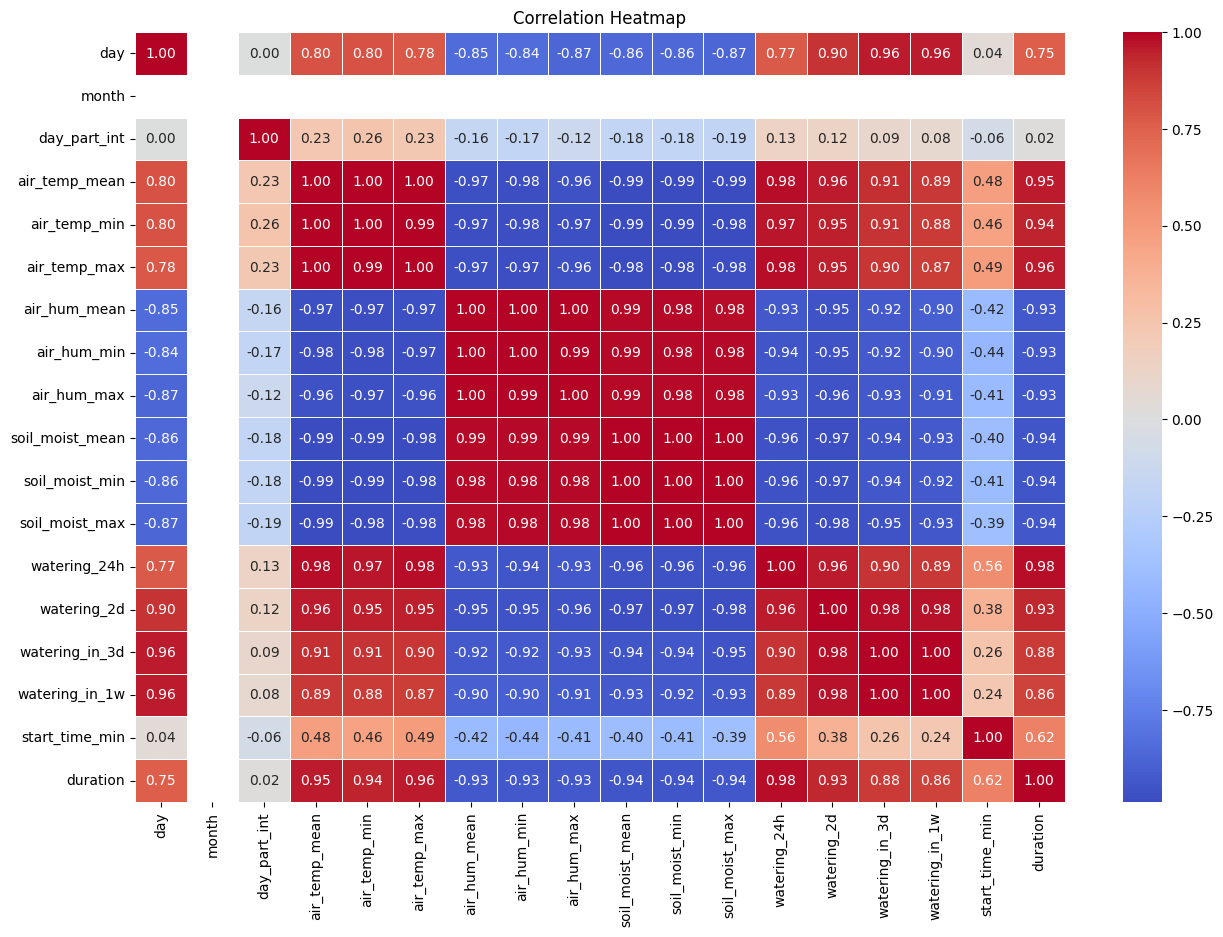

In [72]:
correlation_matrix = df2.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Spilt data into train and test

In [76]:
! pip install scikit-learn

from sklearn.model_selection import train_test_split

  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 468.3 kB/s  0:01:18m0:00:0100:03
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
